In [1]:
import subprocess

import numpy as np

In [2]:
n_tasks = 100
n_members = 20
t = np.random.randint(1, 100, (n_members, n_tasks))
for i in range(n_members):
    t[i] *= (5 + i)
t[:] //= 20
t

array([[ 15,  24,   1, ...,   2,   1,  20],
       [ 24,   6,  20, ...,  26,  14,  29],
       [ 22,   9,   9, ...,   0,  16,   0],
       ...,
       [  5,  22, 102, ..., 103,  14,  60],
       [105, 105,  28, ...,  79,  51,  14],
       [ 74,  50,  24, ...,  78,  39,   6]])

In [84]:
n = n_tasks * n_members + 2
m = n_tasks + n_members + 1
with open("in2.txt", "w") as f:
    print(m, n, file=f)
    c = np.random.random(n_tasks * n_members) * 0.0
    print(*c, -1, 10000, file=f)
    b = np.random.random(n_members) * 20.0
    for i in range(n_members):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i*n_tasks:(i+1)*n_tasks] = t[i]
        print(*c, -1, 0, b[i], file=f)
    for i in range(n_tasks):
        c = np.zeros(n_tasks * n_members, dtype=np.int32)
        c[i::n_tasks] = -1
        print(*c, 0, 1, 0, file=f)
    c = np.zeros(n_tasks * n_members, dtype=np.int32)
    print(*c, 0, 1, 1, file=f)

In [85]:
%%time
subprocess.run("./a.out 1000 < in2.txt > out2.txt", shell=True)

CPU times: user 2.12 ms, sys: 4.29 ms, total: 6.41 ms
Wall time: 261 ms


CompletedProcess(args='./a.out 1000 < in2.txt > out2.txt', returncode=0)

In [86]:
res = !cat out2.txt
res = list(map(float, res[1].split()))

In [87]:
X, target, v = res[:-2], res[-2], res[-1]
target, v

(7.72809, 1.0)

In [88]:
X = np.array(X).reshape(n_members, n_tasks)

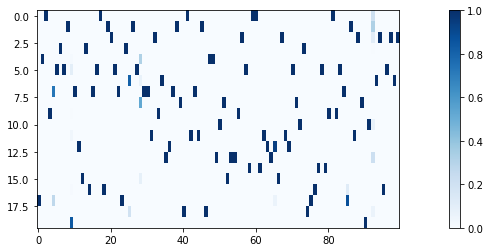

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 4))
plt.imshow(X, aspect=3, cmap="Blues")
plt.colorbar()
plt.show()

In [90]:
X.sum(0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.00000012,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.9999995 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [93]:
(X * t).sum(1) - b

array([7.72808656, 7.72808754, 7.72809178, 7.72808641, 7.72807837,
       7.72808688, 7.72809234, 7.72808593, 7.7280768 , 7.72808624,
       7.72808614, 7.72808873, 7.72808642, 7.72809221, 7.72808609,
       7.72808689, 7.72808364, 7.72808925, 7.72808105, 7.72808614])

In [94]:
b

array([ 1.51936144, 14.18725546, 17.80383022,  4.35348404, 15.03725143,
        6.54962852, 15.65051056,  9.65373807, 15.5372202 ,  0.4174248 ,
       14.17748016, 13.86197847,  2.83740258, 12.58374779,  7.38112616,
       15.16394551,  7.44991816, 14.72547275, 19.50570035, 17.27366386])